# Capstone Project - The Battle of the Neighborhoods 
### Applied Data Science Capstone by IBM/Coursera
## Part 1. Choosing the safest areas of Winnipeg

##### Problem
In my project, I analyzed which parts of the city of Winnipeg are best suited for living with children, in terms of safety, proximity to schools, and availability of various activities.

##### Interest
This project is intended for families with children who want to move to live in Winnipeg. It can also be useful for realtors offering to buy a house or apartment for families with school-age children.


In [1]:
import pandas as pd # library for data analsysis

In [2]:
import numpy as np
import math

In [3]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In [4]:
from pandas import ExcelWriter
from pandas import ExcelFile

### Every parent wants to create a safe environment for their child, so let's choose the three safest areas in Winnipeg.

### To do this, use the data on crimes in each area of Winnipeg from the resource: https://www.winnipeg.ca/police/AnnualReports/annualreports.stm

In [157]:
df_crime_total = pd.read_excel('D:\Crime_Winnipeg_TOTAL_2015_2018.xlsx')
print("Column headings:")
print(df_crime_total.columns)

Column headings:
Index(['WARD', 'Total_2015', 'Total_2016', 'Total_2017', 'Total_2018',
       'Total'],
      dtype='object')


Unfortunately, data for 2019 is not available yet, and data earlier than 2015 in the reports are provided for the entire city, so the review period is from 2015 to 2018.

In [158]:
df_crime_total.head()

,WARD,Total_2015,Total_2016,Total_2017,Total_2018,Total
0,Assiniboine South,1046,1032,918,1288,4284
1,Downtown,11854,14116,15077,16787,57834
2,Fort Garry,2625,3061,2621,3609,11916
3,Inkster,1910,2165,2421,2935,9431
4,Point Douglas,5647,6566,7167,7418,26798


In [155]:
df_crime_total.sort_values(by=['Total_2018'])

,Total_2015,Total_2016,Total_2017,Total_2018
WARD,,,,
Assiniboine South,1046,1032,918,1288
Transcona,1559,1827,1735,1967
St. Vital,2160,2281,2605,2708
Inkster,1910,2165,2421,2935
St. Boniface,1948,2404,2355,3525
Fort Garry,2625,3061,2621,3609
Seven Oaks,2981,3284,3273,3989
St. James-Assiniboia,3008,3286,3095,4029
River East,4136,4463,4617,4692


In [132]:
df_crime_total.drop(['Total'], axis='columns', inplace=True)

In [133]:
df_crime_total.set_index('WARD', inplace=True)
df_plot_crime=df_crime_total.transpose()

<Figure size 432x288 with 0 Axes>

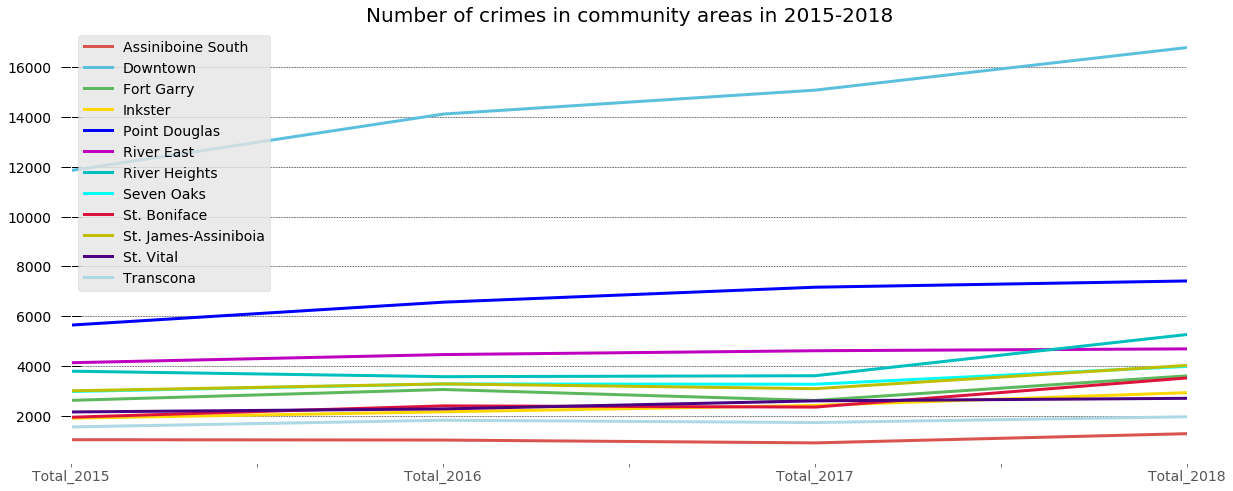

In [134]:

fig = plt.figure()
n=0
colors_list =['#d9534f','#5bc0de','#5cb85c','gold','blue','m', 'c', 'cyan', 'crimson', 'y', 'indigo','lightblue']

ax=df_plot_crime.plot(kind='line', linewidth = 3,
                   figsize=(20, 8),
                   fontsize=14,rot=0,
                   color=colors_list) # rotate the bars by 90 degrees
ax.set_facecolor('white')
#ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.tick_params(axis='y',    
               direction = 'inout',   
               length = 20,   
               width = 1,     
               color = 'black',    
               pad = 10,   
               labelsize = 14,   
               labelcolor = 'black',   
               bottom = True,   
               top = True,    
               left = True,    
               labelbottom = True,    
               labeltop = True,   
               labelleft = True,   
              )

ax.grid(axis = 'y', color = 'black',   
        linewidth = 0.5,   
        linestyle = '--')  
ax.set_xlabel('', fontsize=16)
ax.set_title('Number of crimes in community areas in 2015-2018', fontsize=20)
plt.legend(fontsize=14) 
plt.show()

In [135]:
df_crime_VIOLENT = pd.read_excel('D:\Crime_Winnipeg.xlsx')
df_crime_VIOLENT.head()

,Unnamed: 0,WARD,VIOLENT_2015,VIOLENT_2016,VIOLENT_2017,VIOLENT_2018
0,NaN,Assiniboine South,211,169,169,179
1,NaN,Downtown,2858,3213,3589,3572
2,NaN,Fort Garry,364,412,331,494
3,NaN,Inkster,387,436,469,433
4,NaN,Point Douglas,1748,1845,1909,1874


In [136]:
df_crime_VIOLENT.sort_values(by=['VIOLENT_2018'])

,Unnamed: 0,WARD,VIOLENT_2015,VIOLENT_2016,VIOLENT_2017,VIOLENT_2018
0,NaN,Assiniboine South,211,169,169,179
11,NaN,Transcona,195,230,216,256
10,NaN,St. Vital,323,330,344,342
8,NaN,St. Boniface,299,379,300,385
3,NaN,Inkster,387,436,469,433
2,NaN,Fort Garry,364,412,331,494
6,NaN,River Heights,397,436,408,495
7,NaN,Seven Oaks,486,524,545,548
9,NaN,St. James-Assiniboia,452,512,527,586
5,NaN,River East,751,915,899,865


In [137]:
df_crime_2018 = pd.read_excel('D:\Crime_Winnipeg_2018.xlsx')
df_crime_2018.head()

,WARD,VIOLENT_CRIMES,PROPERTY_CRIMES,OTHER_CRIMES,TOTAL_2018
0,Assiniboine South,179,1012,97,1288
1,Downtown,3572,11126,2089,16787
2,Fort Garry,494,2868,247,3609
3,Inkster,433,2258,244,2935
4,Point Douglas,1874,4384,1160,7418


In [138]:
df_sort = df_crime_2018.sort_values(by=['TOTAL_2018'])

In [139]:
df_sort.set_index('WARD', inplace=True)

In [140]:
x=np.ones([12,4], dtype=np.float64)

<Figure size 432x288 with 0 Axes>

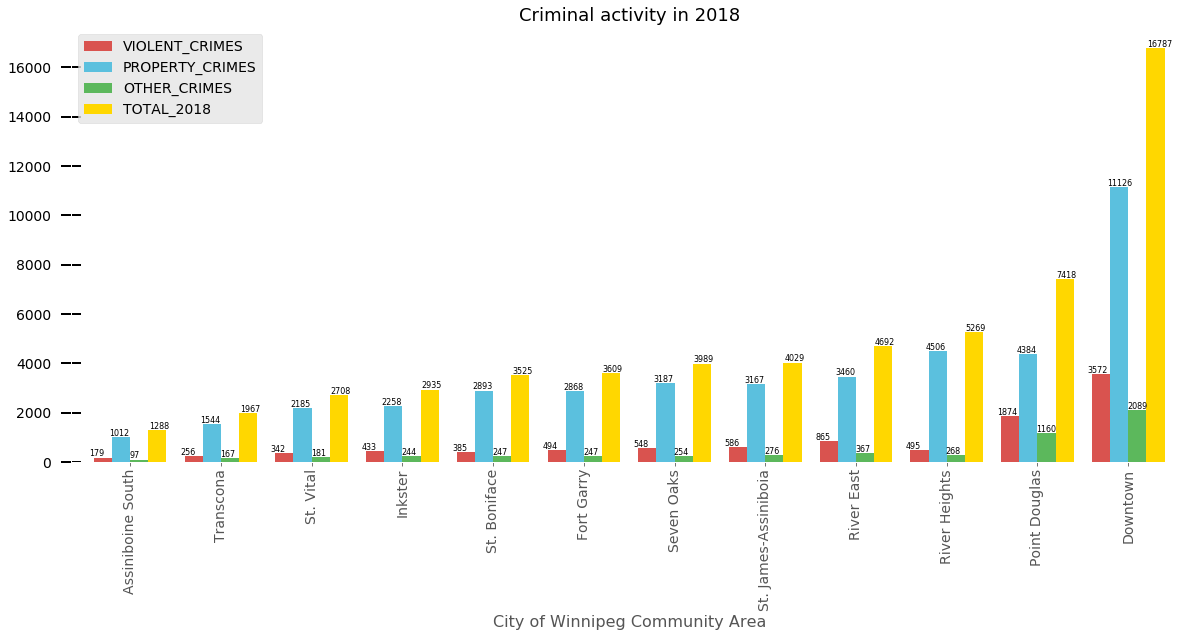

In [141]:
import matplotlib.ticker as ticker

fig = plt.figure()
n=0
colors_list =['#d9534f','#5bc0de','#5cb85c','gold']

ax=df_sort.plot(kind='bar', 
                   figsize=(20,8),
                   width=0.8, fontsize=14,rot=90,
                   color=colors_list) # rotate the bars by 90 degrees
ax.set_facecolor('white')
ax.tick_params(axis='y',  which = 'major',    
               direction = 'inout',   
               length = 20,   
               width = 2,     
               color = 'black',    
               pad = 10,   
               labelsize = 14,   
               labelcolor = 'black',   
               bottom = True,   
               top = True,    
               left = True,    
               labelbottom = True,    
               labeltop = True,   
               labelleft = True,   
              )
for i in range(0,12):
    for j in range(0,4):
        plt.annotate(df_sort.iloc[i,j], xy=(((n*0.16-0.45)+i*(0.36)+0.06*j), df_sort.iloc[i,j]+50),  fontsize=8, color='black')
        n+=1

ax.set_xlabel('City of Winnipeg Community Area', fontsize=16)
ax.set_title('Criminal activity in 2018', fontsize=18)
plt.legend(fontsize=14) 
plt.show()

Let's look at the population for each district. I took Census data for 1996, 2001, 2006 and 2011, 2016 by district (https://www.winnipeg.ca/census/sitemap/sitemap.asp) and combined them into one table:

In [145]:
df_population = pd.read_excel('D:\Population_Winnipeg.xlsx')
df_population.head(6)

,Ward,1971_CENSUS,1976_CENSUS,1981_CENSUS,1986_CENSUS,1991_CENSUS,1996_CENSUS,2001_CENSUS,2006_CENSUS,2011_CENSUS,2016_CENSUS
0,Transcona,22425,24810,26015,27955,30695,30895,30255,30740,33350,36280
1,St. Vital,32500,39365,43620,51030,57395,59540,59840,61605,65330,67580
2,Assiniboine South,16580,25995,30730,34320,35715,36095,35035,34610,34105,33405
3,Inkster,18530,19390,22115,25705,29460,29930,29535,29110,30160,31990
4,St. Boniface,45985,45270,43090,42305,43520,44505,45600,49155,53755,58520


In [146]:
df_population.set_index('Ward', inplace=True)

In [147]:
df_plot=df_population.transpose()

In [148]:
df_plot

Ward,Transcona,St. Vital,Assiniboine South,Inkster,St. Boniface
1971_CENSUS,22425,32500,16580,18530,45985
1976_CENSUS,24810,39365,25995,19390,45270
1981_CENSUS,26015,43620,30730,22115,43090
1986_CENSUS,27955,51030,34320,25705,42305
1991_CENSUS,30695,57395,35715,29460,43520
1996_CENSUS,30895,59540,36095,29930,44505
2001_CENSUS,30255,59840,35035,29535,45600
2006_CENSUS,30740,61605,34610,29110,49155
2011_CENSUS,33350,65330,34105,30160,53755
2016_CENSUS,36280,67580,33405,31990,58520


<Figure size 432x288 with 0 Axes>

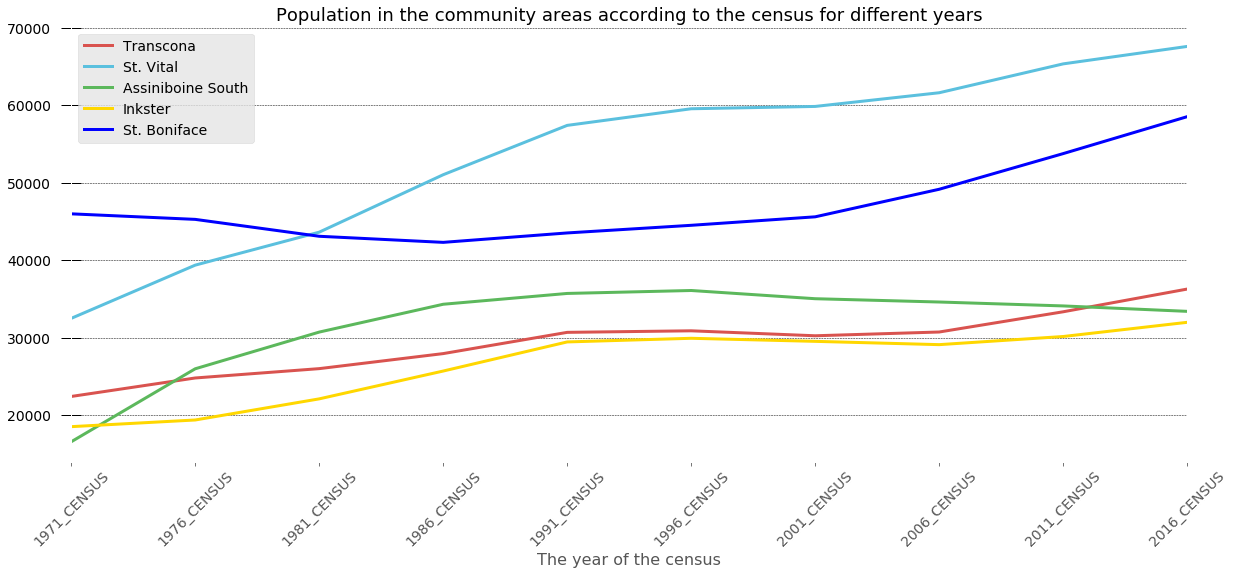

In [149]:
fig = plt.figure()
n=0
colors_list =['#d9534f','#5bc0de','#5cb85c','gold','blue']

ax=df_plot.plot(kind='line', linewidth = 3,
                   figsize=(20, 8),
                   fontsize=14,rot=45,
                   color=colors_list) # rotate the bars by 90 degrees
ax.set_facecolor('white')
#ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.tick_params(axis='y',    
               direction = 'inout',   
               length = 20,   
               width = 1,     
               color = 'black',    
               pad = 10,   
               labelsize = 14,   
               labelcolor = 'black',   
               bottom = True,   
               top = True,    
               left = True,    
               labelbottom = True,    
               labeltop = True,   
               labelleft = True,   
              )

ax.grid(axis = 'y', color = 'black',   
        linewidth = 0.5,   
        linestyle = '--')  
ax.set_xlabel('The year of the census', fontsize=16)
ax.set_title('Population in the community areas according to the census for different years', fontsize=18)
plt.legend(fontsize=14) 
plt.show()



From the graph we see that the St.Vital number of population is two times more than in Assiniboine South, therefore these data cannot be considered to compare.

In [167]:
df_Pop_area = pd.read_excel('D:\Population_AREA_Winnipeg.xlsx')
df_Pop_area.head()

,WARD,Populated,Land Area
0,Assiniboine South,33405,61.233756
1,Downtown,66850,16.323764
2,Fort Garry,85775,77.045099
3,Inkster,31990,18.096753
4,Point Douglas,40795,10.873163


In [174]:
df_area=df_Pop_area[['WARD','Land Area']].sort_values(by=['Land Area'], ascending=False)

In [175]:
df_area.set_index('WARD', inplace=True)

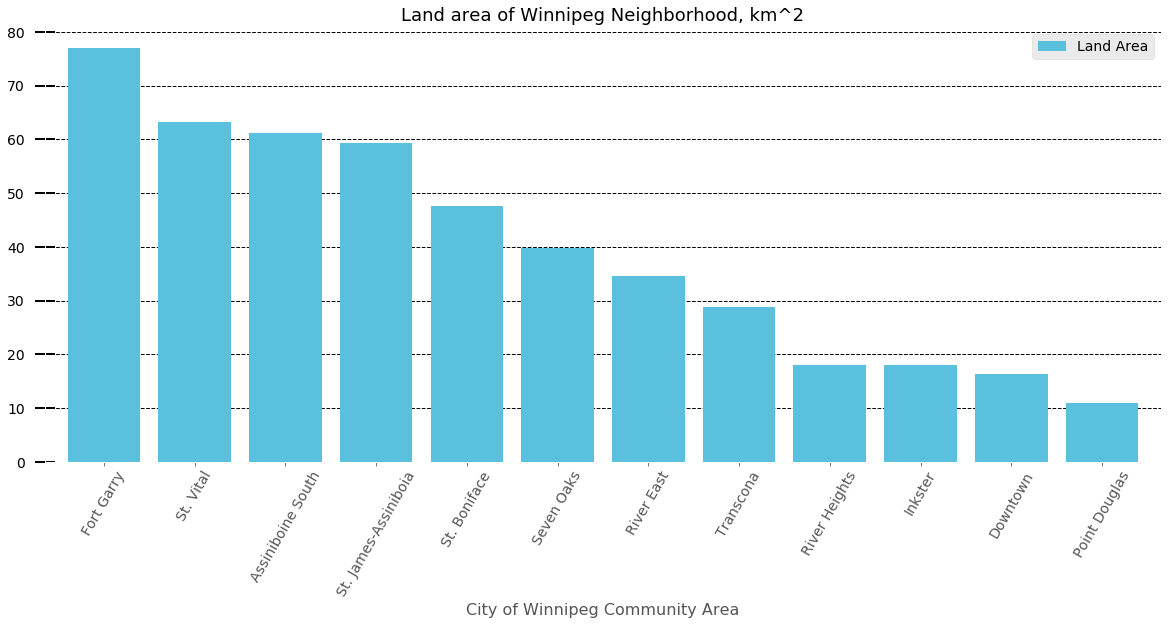

In [176]:
ax=df_area.plot(kind='bar', 
                   figsize=(20, 8),
                   width=0.8, fontsize=14,rot=60,
                   color='#5bc0de') 
ax.set_facecolor('white')
#ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.tick_params(axis='y',  which = 'major',    
               direction = 'inout',   
               length = 20,   
               width = 2,     
               color = 'black',    
               pad = 10,   
               labelsize = 14,   
               labelcolor = 'black',   
               bottom = True,   
               top = True,    
               left = True,    
               labelbottom = True,    
               labeltop = True,   
               labelleft = True,   
              )
n=-0.2
ax.grid(axis = 'y', color = 'black',   
        linewidth = 1,   
        linestyle = '--')  

ax.set_xlabel('City of Winnipeg Community Area', fontsize=16)
ax.set_title('Land area of Winnipeg Neighborhood, km^2', fontsize=18)
plt.legend(fontsize=14) 
plt.show()

In [151]:
total_Popul = df_Pop_area['Populated'].sum()
total_Popul

690025

In [152]:
total_area = df_Pop_area['Land Area'].sum()
total_area 

475.205377

Find the number of crimes committed per capita in each district. Since we know the total number of residents by district only for 2016, let's consider the total crime rate per 10000 people for 2016.

In [159]:
df_Area_Crime = df_crime_total[['WARD','Total_2016']]
df_Area_Crime

,WARD,Total_2016
0,Assiniboine South,1032
1,Downtown,14116
2,Fort Garry,3061
3,Inkster,2165
4,Point Douglas,6566
5,River East,4463
6,River Heights,3576
7,Seven Oaks,3284
8,St. Boniface,2404
9,St. James-Assiniboia,3286


In [160]:
df_Popul_Area_Crime = df_Pop_area.merge(df_Area_Crime)
df_Popul_Area_Crime

,WARD,Populated,Land Area,Total_2016
0,Assiniboine South,33405,61.233756,1032
1,Downtown,66850,16.323764,14116
2,Fort Garry,85775,77.045099,3061
3,Inkster,31990,18.096753,2165
4,Point Douglas,40795,10.873163,6566
5,River East,84610,34.680514,4463
6,River Heights,57375,18.101560,3576
7,Seven Oaks,68360,39.876093,3284
8,St. Boniface,58520,47.654289,2404
9,St. James-Assiniboia,58485,59.263880,3286


Formula for calculating the total crime rate per 10000 people:
#### K = P x 10000 / N

where K is the crime rate

N - the number of facts or the number of persons who have committed crimes

P – population (total or at the appropriate age).

When the calculation is made for the entire population, the coefficient actually reflects only how the population is affected by crime.

In [161]:
df_Popul_Area_Crime['Per_capita'] = ((df_Popul_Area_Crime['Total_2016']*10000)/df_Popul_Area_Crime['Populated']).astype(int)
df_Popul_Area_Crime

,WARD,Populated,Land Area,Total_2016,Per_capita
0,Assiniboine South,33405,61.233756,1032,308
1,Downtown,66850,16.323764,14116,2111
2,Fort Garry,85775,77.045099,3061,356
3,Inkster,31990,18.096753,2165,676
4,Point Douglas,40795,10.873163,6566,1609
5,River East,84610,34.680514,4463,527
6,River Heights,57375,18.101560,3576,623
7,Seven Oaks,68360,39.876093,3284,480
8,St. Boniface,58520,47.654289,2404,410
9,St. James-Assiniboia,58485,59.263880,3286,561


In [162]:
df_Popul_Area_Crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 5 columns):
WARD          12 non-null object
Populated     12 non-null int64
Land Area     12 non-null float64
Total_2016    12 non-null int64
Per_capita    12 non-null int32
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 528.0+ bytes


In [163]:
df_Popul_Area_Crime.sort_values(by=['Per_capita'])

,WARD,Populated,Land Area,Total_2016,Per_capita
0,Assiniboine South,33405,61.233756,1032,308
10,St. Vital,67580,63.278489,2281,337
2,Fort Garry,85775,77.045099,3061,356
8,St. Boniface,58520,47.654289,2404,410
7,Seven Oaks,68360,39.876093,3284,480
11,Transcona,36280,28.778017,1827,503
5,River East,84610,34.680514,4463,527
9,St. James-Assiniboia,58485,59.263880,3286,561
6,River Heights,57375,18.101560,3576,623
3,Inkster,31990,18.096753,2165,676


Therefore, we will select the following areas for further wards:
##### Assiniboine South
##### St. Vital
##### Fort Garry

Note that these wards have the largest area:

In [164]:
df_Popul_Area_Crime.sort_values(by=['Land Area'], ascending=False)

,WARD,Populated,Land Area,Total_2016,Per_capita
2,Fort Garry,85775,77.045099,3061,356
10,St. Vital,67580,63.278489,2281,337
0,Assiniboine South,33405,61.233756,1032,308
9,St. James-Assiniboia,58485,59.263880,3286,561
8,St. Boniface,58520,47.654289,2404,410
7,Seven Oaks,68360,39.876093,3284,480
5,River East,84610,34.680514,4463,527
11,Transcona,36280,28.778017,1827,503
6,River Heights,57375,18.101560,3576,623
3,Inkster,31990,18.096753,2165,676


In [165]:
Hist_crime = df_Popul_Area_Crime[['WARD','Per_capita']]
hist_crime = Hist_crime.sort_values(by=['Per_capita'])
hist_crime.set_index('WARD', inplace=True)
hist_crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Assiniboine South to Downtown
Data columns (total 1 columns):
Per_capita    12 non-null int32
dtypes: int32(1)
memory usage: 144.0+ bytes


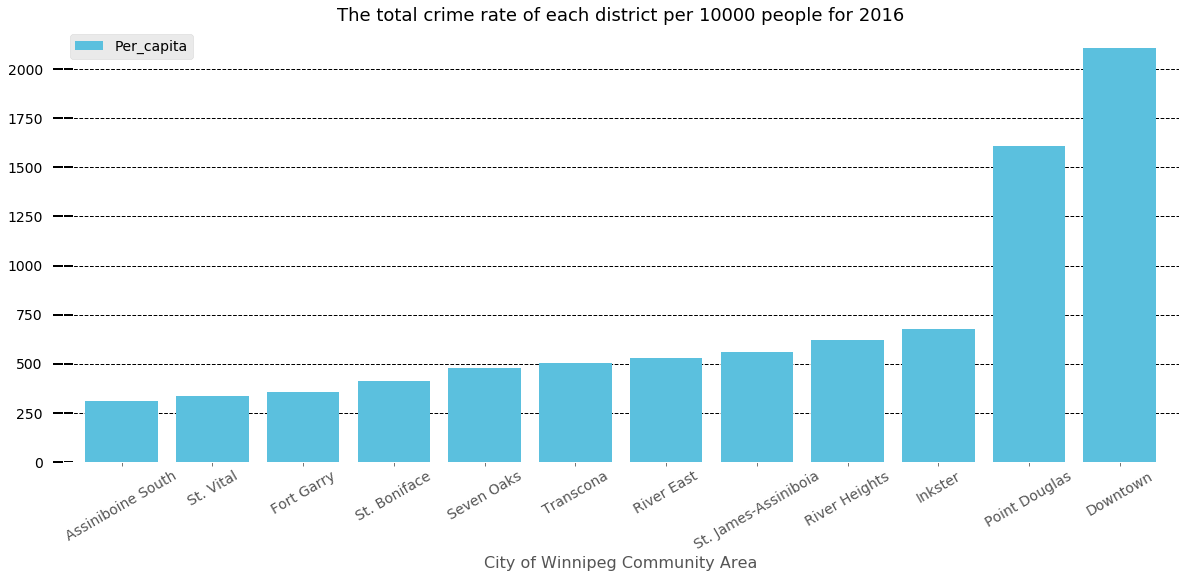

In [166]:

#colors_list =['#d9534f','#5bc0de','#5cb85c','gold']

ax=hist_crime.plot(kind='bar', 
                   figsize=(20, 8),
                   width=0.8, fontsize=14,rot=30,
                   color='#5bc0de') 
ax.set_facecolor('white')
#ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.tick_params(axis='y',  which = 'major',    
               direction = 'inout',   
               length = 20,   
               width = 2,     
               color = 'black',    
               pad = 10,   
               labelsize = 14,   
               labelcolor = 'black',   
               bottom = True,   
               top = True,    
               left = True,    
               labelbottom = True,    
               labeltop = True,   
               labelleft = True,   
              )
n=-0.2
ax.grid(axis = 'y', color = 'black',   
        linewidth = 1,   
        linestyle = '--')  

''''for lab in zip(hist_crime['Per_capita'].astype(int)):
    ax.text(n,  n*100 + 55, lab)
    n=n+1'''
    
            #ha='center', va='bottom')
ax.set_xlabel('City of Winnipeg Community Area', fontsize=16)
ax.set_title('The total crime rate of each district per 10000 people for 2016', fontsize=18)
plt.legend(fontsize=14) 
plt.show()

St.Vital and St.Boniface are part of the <strong><span style="color: blue;"> Louis Riel School Division </span></strong> , the main part of the Ford Garry and Assiniboine South are part of the <strong><span style="color: blue;"> Pembina Trails School Division </span></strong>,  so we will continue to review the schools of only these school divisions. 	